In [4]:
# %%
# from skimage.filters import threshold_local
%matplotlib notebook
# import argparse
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
import imutils
from imutils import perspective
from imutils import contours

In [5]:
width=10

In [6]:
# %%
# load the input image
# image = cv2.imread(args["image"]) 
image = plt.imread("IMG_1097.JPG") 

image = imutils.resize(image, height = 500) # resize
oorig = image.copy()

plt.imshow(image)

<IPython.core.display.Javascript object>

In [58]:
# # Select ROI dynamically in real time
# r = cv2.selectROI(image)

# # Crop image
# roi = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
# a = int(r[1])
# b = int(r[1]+r[3])
# c = int(r[0])
# d = int(r[0]+r[2])
# print(f"{a}:{b}, {c}:{d}")
# cv2.imshow("Cropped ROI", roi)

# y1=a
# y2=b
# x1=c
# x2=d

In [59]:
y1=327 #a
y2=385 #b
x1=218 #c
x2=491 #d

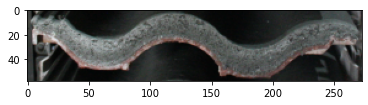

In [60]:
roi = image[y1:y2, x1:x2]
plt.imshow(roi)

In [61]:
image = roi.copy()

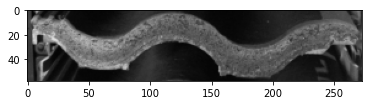

In [62]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(imutils.opencv2matplotlib(gray))

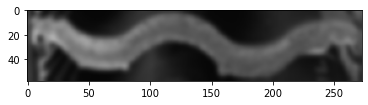

In [63]:
# apply a Gaussian blur with a 7x7 kernel to the image to smooth it,
# reducing high frequency noise
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(imutils.opencv2matplotlib(blurred))

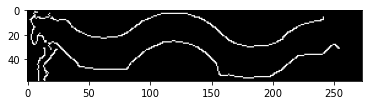

In [64]:
# applying edge detection
# edged = cv2.Canny(gray, 200, 255) 
edged = cv2.Canny(blurred, 50, 150)
plt.imshow(imutils.opencv2matplotlib(edged))

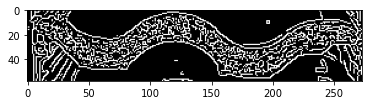

In [65]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edgeMap = imutils.auto_canny(gray)
# plt.imshow(image)
plt.imshow(imutils.opencv2matplotlib(edgeMap))

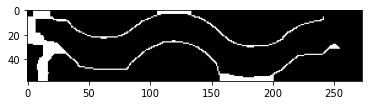

In [66]:
dilated = cv2.dilate(edged, None, iterations=4) # 10 is an interesting number
eroded = cv2.erode(dilated, None, iterations=4)
plt.imshow(imutils.opencv2matplotlib(eroded))

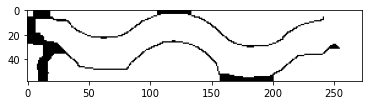

In [67]:
# threshold the image by setting all pixel values less than 225 to 255 
# (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image 
# in short binary inversion
thresh = cv2.threshold(eroded, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(imutils.opencv2matplotlib(thresh))


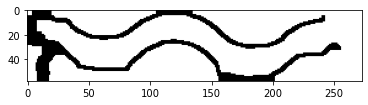

In [68]:
# we apply erosions to reduce the size of foreground objects
# further erosion to lose some unwanted small spaces
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=1)
plt.imshow(imutils.opencv2matplotlib(mask))


In [69]:
# # for viewing all contours / debugging
# contours, hierarchy= cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(image, contours, -1, (0,255,0),1)
# plt.imshow(imutils.opencv2matplotlib(image))

In [70]:
def midpoint(ptA, ptB): # to use in below function
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [71]:
# find contours in the edge map
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)

# TODO: needs to be fine tuned
pixelsPerMetric = 60 # hard coded value


[[218 356]
 [229 356]
 [229 384]
 [218 384]]
[[218 327]
 [491 327]
 [491 385]
 [218 385]]
Area of contour  216.0
[[236 355]
 [373 355]
 [373 384]
 [236 384]]
[[218 327]
 [491 327]
 [491 385]
 [218 385]]
Area of contour  2301.5
[[238 327]
 [322 327]
 [322 347]
 [238 347]]
[[218 327]
 [491 327]
 [491 385]
 [218 385]]
Area of contour  1091.0


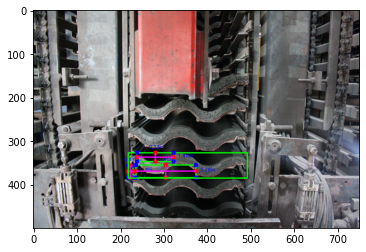

In [74]:
orig = oorig.copy()
# loop over the contours individually
for c in cnts:
	# orig = oorig.copy()
    
	# if the contour is not sufficiently large, ignore it
	# print("Area of contour ", cv2.contourArea(c))
	if cv2.contourArea(c) < 100 or cv2.contourArea(c) > 4000:
		continue
	
	# compute the rotated bounding box of the contour
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
 
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding box
 
	# box = perspective.order_points(box)
	# cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
 #or
	box = perspective.order_points(box)
	box = box.astype("int")+[x1,y1]
	print(box)
	# asd
	# cv2.drawContours(orig, [box.astype("int")+[x1,y1]], -1, (0, 255, 0), 2)
 
	# roic = [[x1,y1],[x2,y1],[x2,y2],[x1,y2]]
	roic = [
        [x1,y1],
        [x2,y1],
        [x2,y2],
     	[x1,y2]
        ]
	roic = np.array(roic, dtype="int")
	print(roic)
 
	cv2.drawContours(orig, [roic.astype("int")], -1, (0, 255, 0), 2)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
 
 
	# print(box.astype("int"))
	# print(box.astype("int")+[x1, y1])
 
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
  
	# unpack the ordered bounding box, then compute the midpoint
	# between the top-left and top-right coordinates, followed by
	# the midpoint between bottom-left and bottom-right coordinates
	(tl, tr, br, bl) = box
	(tltrX, tltrY) = midpoint(tl, tr)
	(blbrX, blbrY) = midpoint(bl, br)
	# compute the midpoint between the top-left and top-right points,
	# followed by the midpoint between the top-righ and bottom-right
	(tlblX, tlblY) = midpoint(tl, bl)
	(trbrX, trbrY) = midpoint(tr, br)
 
	# draw the midpoints on the image
	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
 
	# draw lines between the midpoints
	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
		(255, 0, 255), 2)
 
	# compute the Euclidean distance between the midpoints
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
 
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / 10 # args["width"]
		print("pixelsPerMetric :",pixelsPerMetric)

  
	# compute the size of the object
	dimA = dA / pixelsPerMetric
	dimB = dB / pixelsPerMetric

 
	# draw the object sizes on the image
	cv2.putText(orig, "{:.2f}in".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.35, (0, 0, 255), 1)
	cv2.putText(orig, "{:.2f}in".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.35, (0, 0, 255), 1)
 
	# show the output image
	plt.imshow(orig)
	print("Area of contour ", cv2.contourArea(c))

In [ ]:
cv2.destroyAllWindows()